# SBI CHEQUE VALIDATION USING DEEP NEURAL NETWROK

##                                                        TEAM
###                                           ANUBHAV, VIJENDRA, NEERAJ , ASHUTOSH

## HOW TO RUN:-

### to combine splited files in windows

cd into yolo-data
copy /b file1 + file2 + file3 + file4 filetogether.tar.gz
uncompress filetogether.tar.gz


### How to combine splited files in Ubuntu
cd into yolo-data
cat final-data.tar.gz* | tar xz


### How to  split  big files in Ubuntu
tar cvzf - final-data | split -b 10m - final-data.tar.gz


### darknet commands and YOLO for object detecction
yolo training on 3000 images and with 8000 iteration  

Currently training is still going  on GPU cluster in background mode, lets see after 1 day:-
/datadrive/NeerajAg/yolo/darknet

We tried pretrain darknet model to train further using below command:-
https://pjreddie.com/darknet/yolo/

train:-
./darknet detector train cfg/obj.data cfg/yolo.cfg darknet19_448.conv.23
nohup  ./darknet detector train cfg/obj.data cfg/yolo.cfg  backup/yolo.backup  > training.log &

Test:-
./darknet detector test cfg/obj.data  cfg/yolo.cfg backup/yolo-obj_final.weights /home/ashutosh/sentienceWork/darknet/final-data/final-image-0.jpg -thresh 0

See yolo training log 
Region Avg IOU: 0.481528, Class: 0.994299, Obj: 0.242427, No Obj: 0.004990, Avg Recall: 0.333333,  count: 3
7556: 9.163102, 6.318862 avg, 0.001000 rate, 0.095384 seconds, 7556 images
Loaded: 0.000055 seconds

6.318862 avg loss is too high as per yolo it should be below 0.06 to 0.6

./darknet detector train cfg/obj.data  cfg/yolo-obj.cfg yolo.weights

/home/ashutosh/sentienceWork/darknet/final-data/final-image-0.jpg


/darknet detector train cfg/obj.data cfg/yolo.cfg darknet19_448.conv.23

./darknet detector test cfg/obj.data  cfg/yolo.cfg backup/yolo-obj_final.weights /home/ashutosh/sentienceWork/darknet/final-data/final-image-0.jpg -thresh 0



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


## Adding Amount in words

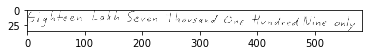

In [28]:
s_img = cv2.imread("in-words-ashu-transparentBG/Eighteen Lakh Seven Thousand One Hundred Nine only.png", -1)
kernel = np.ones((1,1), np.uint8)
s_img = cv2.dilate(s_img, kernel, iterations=1)
height, width = s_img.shape[:2]

s_img2 = cv2.resize(s_img, (int(width/1.5), int(height/1.5)), interpolation = cv2.INTER_AREA)

plt.imshow( s_img2)

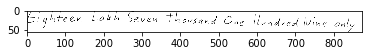

In [29]:
plt.imshow( s_img)

In [4]:
s_img=s_img2

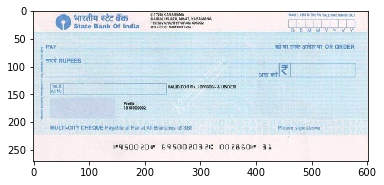

In [30]:
l_img = cv2.imread("cheque.jpg")
l_img = cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB)
plt.imshow( l_img)

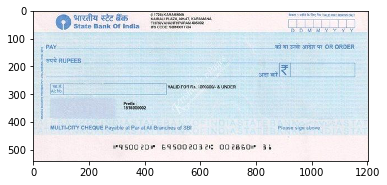

In [31]:

height2, width2 = l_img.shape[:2]
dst = cv2.resize(l_img, (2*width2, 2*height2), interpolation = cv2.INTER_CUBIC)
plt.imshow( dst)

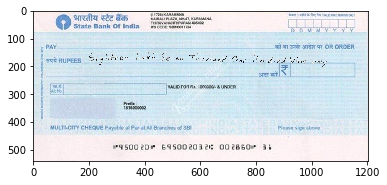

In [32]:



x_offset= 200 
y_offset=150
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s
dst2=dst
for c in range(0, 3):
    dst2[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * dst2[y1:y2, x1:x2, c])
    
plt.imshow( dst2)

## Adding number in box


(28, 141)


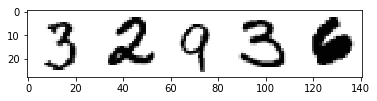

In [33]:
num_img = cv2.imread("Combined_transparent/number_0.png", cv2.IMREAD_GRAYSCALE)

height, width = num_img.shape[:2]
#num_img = cv2.resize(num_img, (int(width/2), int(height/2)), interpolation = cv2.INTER_AREA)
print(num_img.shape)
#num_img_show = cv2.cvtColor(num_img,cv2.IMREAD_GRAYSCALE)
plt.imshow( num_img ,cmap='gray')


True

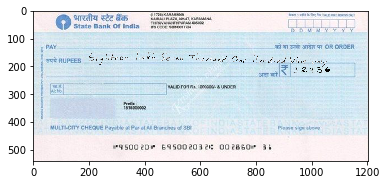

In [34]:
x_offset= 930 
y_offset=200
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + num_img.shape[0]
x1, x2 = x_offset, x_offset + num_img.shape[1]

alpha_s = num_img[:, :] / 255.0
alpha_l = 1.0 - alpha_s
dst3=dst2
for c in range(0, 3):
    dst3[y1:y2, x1:x2, c] = (alpha_l * num_img[:, :] +
                              alpha_s * dst3[y1:y2, x1:x2, c])
    



plt.imshow( dst3)
dst4 = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
cv2.imwrite("final-image.jpg", dst4)


# adding date

In [15]:
from PIL import Image
import os

folder_path_input = "dates_new/"
folder_path_output= "dates-transparentBG/"



image_names =os.listdir(folder_path_input)

for img_name in image_names:
    print (img_name)
    img = Image.open(folder_path_input+img_name)
    img = img.convert("LA")
    datas = img.getdata()
    break
    newData = []
    for item in datas:
        
        if item[0] == 255 :
            newData.append((255,  0))
        else:
            newData.append(item)
            
    #os.chdir(folder_path_output)
    img.putdata(newData)
    img.save(folder_path_output+img_name, "PNG")


date_722.png


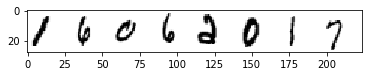

In [16]:
date_img = cv2.imread("dates_new/date_0.png",  cv2.IMREAD_GRAYSCALE)

height, width = date_img.shape[:2]
date_img = cv2.resize(date_img, (int(width/1.5), int(height/1)), interpolation = cv2.INTER_AREA)
plt.imshow( date_img ,cmap='gray')


True

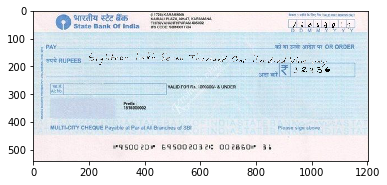

In [17]:
x_offset= 930 
y_offset=40
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + date_img.shape[0]
x1, x2 = x_offset, x_offset + date_img.shape[1]

alpha_s = date_img[:, :] / 255.0
alpha_l = 1.0 - alpha_s
dst4=dst3
for c in range(0, 3):
    dst4[y1:y2, x1:x2, c] = (alpha_l * date_img[:, :] +
                              alpha_s * dst3[y1:y2, x1:x2, c])
    



plt.imshow( dst4)
dst5 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
cv2.imwrite("final-image.jpg", dst5)

In [2]:
 import csv

In [ ]:
with open('details.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    for row in spamreader:
        if(header):
            header = False
            continue
        print( row)
        break

In [8]:
with open('final-data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    with open('details.csv', 'r') as csvfile2:
        spamreader = csv.reader(csvfile2, delimiter=',')
        header = True
        for row in spamreader:
            if(header):
                header = False
                continue
            else:
                #print( row)
                try:
                    originalRow=row
                    blankCheques=["cheque-coffe.jpg" ,"cheque-faint.jpg" , "cheque-hue.jpg", "cheque-old.jpg", "cheque-original.jpg","cheque-photocopy.jpg","cheque-reflection.jpg"]
                    for chq in blankCheques:
                        row=originalRow
                        #print(chq)
                        l_img = cv2.imread("testChequeImages/"+chq)
                        #print(l_img)
                        l_img = cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB)
                        #plt.imshow( l_img)
                        #break
                        height2, width2 = l_img.shape[:2]

                        dst = cv2.resize(l_img, (2*width2, 2*height2), interpolation = cv2.INTER_CUBIC)

                        s_img = cv2.imread("in-words-ashu-transparentBG/" +row[4]+".png", -1)

                        height, width = s_img.shape[:2]

                        #s_img = cv2.dilate(s_img, kernel, iterations=50)
                        s_img2 = cv2.resize(s_img, (int(width/1.5), int(height/1.5)), interpolation = cv2.INTER_AREA)
                        kernel = np.ones((1,1), np.uint8)
                        s_img2 = cv2.dilate(s_img2, kernel, iterations=50)
                        #plt.imshow( s_img2)
                        x_offset= 200 
                        y_offset=150
                        #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                        #s_img = cv2.imread("smaller_image.png")

                        y1, y2 = y_offset, y_offset + s_img2.shape[0]
                        x1, x2 = x_offset, x_offset + s_img2.shape[1]

                        alpha_s = s_img2[:, :, 3] / 255.0
                        alpha_l = 1.0 - alpha_s
                        dst2=dst
                        for c in range(0, 3):
                            dst2[y1:y2, x1:x2, c] = (alpha_s * s_img2[:, :, c] +
                                                      alpha_l * dst[y1:y2, x1:x2, c])

                        row=row+["box1",x1,y1,x2,y2]
                        #print(x1,y1,x2,y2)
                        #plt.imshow( dst2)
                        ####################################

                        num_img = cv2.imread("Combined_transparent/" +row[6], cv2.IMREAD_GRAYSCALE)

                        height, width = num_img.shape[:2]
                        x_offset= 930 
                        y_offset=200
                        #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                        #s_img = cv2.imread("smaller_image.png")

                        y1, y2 = y_offset, y_offset + num_img.shape[0]
                        x1, x2 = x_offset, x_offset + num_img.shape[1]

                        alpha_s = num_img[:, :] / 255.0
                        alpha_l = 1.0 - alpha_s
                        dst3=dst2
                        for c in range(0, 3):
                            dst3[y1:y2, x1:x2, c] = (alpha_l * num_img[:, :] +
                                                      alpha_s * dst3[y1:y2, x1:x2, c])

                        row=row+["box2",x1,y1,x2,y2]
                        #print(x1,y1,x2,y2)
                        ####################################
                        date_img = cv2.imread("dates_new/" +row[8],  cv2.IMREAD_GRAYSCALE)

                        height, width = date_img.shape[:2]
                        date_img = cv2.resize(date_img, (int(width/1.5), int(height/1)), interpolation = cv2.INTER_AREA)
                        x_offset= 930 
                        y_offset=40
                        #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                        #s_img = cv2.imread("smaller_image.png")

                        y1, y2 = y_offset, y_offset + date_img.shape[0]
                        x1, x2 = x_offset, x_offset + date_img.shape[1]

                        alpha_s = date_img[:, :] / 255.0
                        alpha_l = 1.0 - alpha_s
                        dst4=dst3
                        for c in range(0, 3):
                            dst4[y1:y2, x1:x2, c] = (alpha_l * date_img[:, :] +
                                                      alpha_s * dst4[y1:y2, x1:x2, c])

                        row=row+["box3",x1,y1,x2,y2]
                        #print(x1,y1,x2,y2)
                        #plt.imshow( dst4)
                        dst5 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
                        name=chq.split(".")
                        #print(name)
                        cv2.imwrite("final-data/final-image-"+row[0]+"-"+name[0]+".jpg", dst5)
                        row=row+["final-data/final-image-"+row[0]+"-"+name[0]+".jpg"]
                        row=row+["final-image-"+row[0]+"-"+name[0]+".jpg"]
                        writer.writerow(row)
                    #break
                except :
                        print("issue occured")
                        pass
                #break

issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue occured
issue 

# Removing files having zero size

In [28]:
from PIL import Image
with open('final-data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    with open("final-data-filtered.csv", 'w') as csvfile2:
        writer = csv.writer(csvfile2, delimiter=',')
        for row in spamreader:
            
            try:
                im = Image.open(row[24])
                width, height = im.size
                #print(width, height)
                writer.writerow(row)
            except:
                print(row)
                break
                pass
        
            break

## Average width hight

In [19]:
from PIL import Image
with open('final-data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    
    im=Image.open("testChequeImages/cheque-coffe.jpg")
    w= int(im.size[0])
    h= int(im.size[1])
    dw = 1./w
    dh = 1./h
    for row in spamreader:
        """
        if(header):
            header = False
            print( row)
            continue
        else:
            print( row)
            break
        """
        
        #print( row)
        #print(len(row))
        #print( row[9])
        #print( row[14])
        #print( row[19])
        with open("final-data-txt/"+row[25].split(".")[0]+'.txt', 'w') as csvfile2:
           
            x = (int(row[10]) + int(row[12]))/2.0
            y = (int(row[11]) + int(row[13]))/2.0
            w = int(row[12] )- int(row[10])
            h = int(row[13]) - int(row[11])
            x = x*dw
            w = w*dw
            y = y*dh
            h = h*dh
            #print(x,y,w,h)
            writer = csv.writer(csvfile2, delimiter=' ')
            writeRow=[0]+[x,y,w,h]
            writer.writerow(writeRow)
            
            x = (int(row[10+5]) + int(row[12+5])-10)/2.0
            y = (int(row[11+5]) + int(row[13+5]))/2.0
            w = int(row[12+5] )- int(row[10+5])+10
            h = int(row[13+5]) - int(row[11+5])
            x = x*dw
            w = w*dw
            y = y*dh
            h = h*dh
            #print(x,y,w,h)
            writer = csv.writer(csvfile2, delimiter=' ')
            writeRow=[1]+[x,y,w,h]
            writer.writerow(writeRow)
            
            x = (int(row[10+5+5]) + int(row[12+5+5])-10)/2.0
            y = (int(row[11+5+5]) + int(row[13+5+5]))/2.0
            w = int(row[12+5+5] )- int(row[10+5+5])+10
            h = int(row[13+5+5]) - int(row[11+5+5])
            x = x*dw
            w = w*dw
            y = y*dh
            h = h*dh
            #print(x,y,w,h)
            writer = csv.writer(csvfile2, delimiter=' ')
            writeRow=[2]+[x,y,w,h]
            writer.writerow(writeRow)
        #break

IndexError: list index out of range

## Absolute width height

## building test and train data for YOLO

In [34]:
import glob, os

# Current directory
current_dir = os.path.dirname(os.path.abspath('final-data/final-image-0-cheque-original.jpg'))
print(current_dir)
# Directory where the data will reside, relative to 'darknet.exe'
path_data = 'final-data/'

# Percentage of images to be used for the test set
percentage_test = 10;

# Create and/or truncate train.txt and test.txt
file_train = open('train.txt', 'w')  
file_test = open('test.txt', 'w')

# Populate train.txt and test.txt
counter = 1  
index_test = round(100 / percentage_test)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    #removing 0 size images from test and train
    try:
        im = Image.open(pathAndFilename)
        width, height = im.size
        
        #print(width, height)
        #writer.writerow(row)
        if counter == index_test:
            counter = 1
            file_test.write(path_data + title + '.jpg' + "\n")
        else:
            file_train.write(path_data + title + '.jpg' + "\n")
            counter = counter + 1
    except:
        #removing 0 size images from test and train
        #print(pathAndFilename)
        #break
        pass
    

/home/ashutosh/sentienceWork/magnet/final-data
